<a href="https://colab.research.google.com/github/endzix22/machine-learning-bootcamp/blob/main/PCA_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px 

np.set_printoptions(precision=4,suppress=True,linewidth=150)

Zaladowanie danych

*dane dotyczace, czy nowotwor zlosliwy, czy tez nie



In [3]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
all_data = raw_data.copy()
data = all_data['data']
target = all_data['target']
data[:3]

array([[  17.99  ,   10.38  ,  122.8   , 1001.    ,    0.1184,    0.2776,    0.3001,    0.1471,    0.2419,    0.0787,    1.095 ,    0.9053,
           8.589 ,  153.4   ,    0.0064,    0.049 ,    0.0537,    0.0159,    0.03  ,    0.0062,   25.38  ,   17.33  ,  184.6   , 2019.    ,
           0.1622,    0.6656,    0.7119,    0.2654,    0.4601,    0.1189],
       [  20.57  ,   17.77  ,  132.9   , 1326.    ,    0.0847,    0.0786,    0.0869,    0.0702,    0.1812,    0.0567,    0.5435,    0.7339,
           3.398 ,   74.08  ,    0.0052,    0.0131,    0.0186,    0.0134,    0.0139,    0.0035,   24.99  ,   23.41  ,  158.8   , 1956.    ,
           0.1238,    0.1866,    0.2416,    0.186 ,    0.275 ,    0.089 ],
       [  19.69  ,   21.25  ,  130.    , 1203.    ,    0.1096,    0.1599,    0.1974,    0.1279,    0.2069,    0.06  ,    0.7456,    0.7869,
           4.585 ,   94.03  ,    0.0062,    0.0401,    0.0383,    0.0206,    0.0225,    0.0046,   23.57  ,   25.53  ,  152.5   , 1709.    ,
          

In [4]:
target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [6]:
data.shape
#mamy 569 probek i 30 zmiennych i chcemy wlasnie zredukowac ta liczbe zmiennych

(569, 30)

Standaryzacja

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:3] #wyswietlmy 3 pierwsze probki

array([[ 1.0971, -2.0733,  1.2699,  0.9844,  1.5685,  3.2835,  2.6529,  2.5325,  2.2175,  2.2557,  2.4897, -0.5653,  2.833 ,  2.4876, -0.214 ,
         1.3169,  0.724 ,  0.6608,  1.1488,  0.9071,  1.8867, -1.3593,  2.3036,  2.0012,  1.3077,  2.6167,  2.1095,  2.2961,  2.7506,  1.937 ],
       [ 1.8298, -0.3536,  1.686 ,  1.9087, -0.827 , -0.4871, -0.0238,  0.5481,  0.0014, -0.8687,  0.4993, -0.8762,  0.2633,  0.7424, -0.6054,
        -0.6929, -0.4408,  0.2602, -0.8055, -0.0994,  1.8059, -0.3692,  1.5351,  1.8905, -0.3756, -0.4304, -0.1467,  1.0871, -0.2439,  0.2812],
       [ 1.5799,  0.4562,  1.5665,  1.5589,  0.9422,  1.0529,  1.3635,  2.0372,  0.9397, -0.398 ,  1.2287, -0.7801,  0.8509,  1.1813, -0.297 ,
         0.815 ,  0.2131,  1.4248,  0.237 ,  0.2936,  1.5119, -0.024 ,  1.3475,  1.4563,  0.5274,  1.0829,  0.855 ,  1.955 ,  1.1523,  0.2014]])

PCA -2 komponenty

In [12]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
#2 komponenty, czyli dwie kolumny
data_pca=pca.fit_transform(data_std)
data_pca[:5] #wyswietlmy 5 pierwszych..

array([[ 9.1928,  1.9486],
       [ 2.3878, -3.7682],
       [ 5.7339, -1.0752],
       [ 7.123 , 10.2756],
       [ 3.9353, -1.9481]])

In [20]:
#teraz zbudujmy obiekt DF 

pca_2=pd.DataFrame(data={'pca_1':data_pca[:,0],'pca_2':data_pca[:,1],'class':target})
pca_2.replace(0,'Benign',inplace=True) #mapowanie 0 zamienimy na klase 'Benign'
pca_2.replace(1,'Malignant',inplace=True) #mapowanie 1 zamienimy na klase 'Malignant'
pca_2.head()

,pca_1,pca_2,class
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign


In [21]:
#policzmy skumulowana wariancje wyjasniona
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2


In [22]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 2 components', width=950, template='plotly_dark'))
fig.show()

Na podstawie tycb 2 komponentow, mamy ok 63% skumulowanej kowariancji

In [23]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], width=950, template='plotly_dark')

PCA - 3 komponenty

In [24]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486, -1.1232],
       [ 2.3878, -3.7682, -0.5293],
       [ 5.7339, -1.0752, -0.5517],
       [ 7.123 , 10.2756, -3.2328],
       [ 3.9353, -1.9481,  1.3898]])

In [25]:
pca_3 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'pca_3': data_pca[:, 2], 'class': target})
pca_3.replace(0, 'Benign', inplace=True)
pca_3.replace(1, 'Malignant', inplace=True)
pca_3.head()

,pca_1,pca_2,pca_3,class
0,9.192837,1.948583,-1.123167,Benign
1,2.387802,-3.768172,-0.529295,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232790,Benign
4,3.935302,-1.948072,1.389765,Benign


In [26]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2
2,0.093932,0.726364,3


In [27]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

Na podstwie tych 3 komponentow mamy 73% skumulowanej kowariancji

In [28]:

px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', symbol='class', 
              opacity=0.7, size_max=10, width=950, template='plotly_dark')

ZBIOR DANYCH MNIST

In [30]:
#zaimplementowanie zbioru danych z biblioteki keras 
#czesto sa one wykorzystywane do budowania sieci neuronowych 

from keras.datasets import mnist 

(X_train,y_train),(X_test,y_test)=mnist.load_data()

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (60000, 28, 28)
X_test.shape: (10000, 28, 28)
y_train.shape: (60000,)
y_test.shape: (10000,)


Odcięcie danych do pierwszych 5000 zdjec

In [31]:
X_train=X_train[:5000]
y_train=y_train[:5000]


In [33]:
X_train[0]
#wyswietlenie przykladowej probki

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [35]:
y_train[:5]
#wyswietlmy 5 pierwszych klas ze zbioru treningowego

array([5, 0, 4, 1, 9], dtype=uint8)

Wizualizacja danych

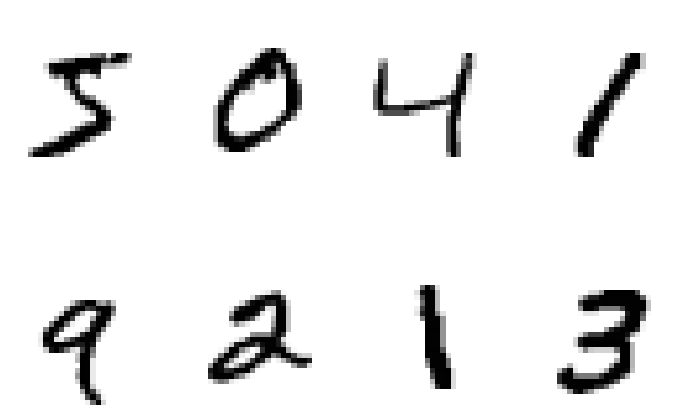

In [37]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='white', fontsize=17)
    plt.axis('off')
plt.show()

#zdj niskiej jakosci 28x28 pikseli

Standaryzacja, bo wartosci sa od 0 do 255

In [38]:
X_train=X_train/255.
X_test=X_test/255.
X_train.shape

(5000, 28, 28)

Wypłaszczanie obrazow

In [39]:
#bo ksztalt 28x28
#wyplaszczymy je metoda reshape 

X_train=X_train.reshape(-1,28*28)
X_train.shape

(5000, 784)

PCA- 3 komponenty

In [40]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.4555,  1.4465, -0.1265],
       [ 4.0678,  1.5157,  2.1629],
       [-0.1116, -1.7779, -0.6183],
       [-3.4395,  2.3377,  0.6106],
       [-1.403 , -2.6951, -0.1722]])

Wyjasniona wariancja,

nastepnie wyswietlimy sobie z tego wykres

In [41]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3


In [42]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template='plotly_dark'))
fig.show()

Całkowita wyjasniona wariancja przy pomocy 3 glownym skaldowych (n_components=3), wynosi 23%

In [44]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

#df to 3 komponenty teraz +class

,pca_1,pca_2,pca_3,class
0,0.455482,1.446452,-0.126542,5.0
1,4.067781,1.515659,2.162865,0.0
2,-0.111577,-1.777918,-0.618259,4.0
3,-3.439490,2.337679,0.610612,1.0
4,-1.403006,-2.695094,-0.172235,9.0


Wizualizacja 3D glownych komponentow

In [45]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', 
              symbol='class', opacity=0.7, size_max=10, width=950, height=700, 
              template='plotly_dark', title='PCA - MNIST dataset')

In [47]:
#mozna zobaczy w ktorym miejscu przewaza dana klasa. 
#jednak widac, ze te dane sie zazebiaja 
#np. w celu ulatwienia analizy mozna sobie wysiwetlic jedna/dwie klasy i zobaczyc jak ona przebiega

Stworzenie PCA i zamiast liczby komponentow podawac %calkowitej wyjasnionej wariancji

In [48]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:1]

array([[ 0.4555,  1.4464, -0.1266, -2.0464, -0.9062,  0.8658,  0.7143,  0.3843,  1.2169, -0.5736,  0.2233, -1.8176, -1.0697,  2.8846,  0.0435,
         0.4055, -1.3517, -0.4881,  0.7439,  1.2559,  0.491 ,  0.8971,  0.7157,  0.7823, -0.2474, -0.3642,  1.3117,  0.4369,  0.4515, -0.1556,
        -0.5905,  0.0318, -0.0879, -0.1545, -0.1757, -0.4434,  0.7237, -0.3561,  0.4432,  1.7112,  0.2673, -0.8439, -0.3894, -0.1528, -0.044 ,
        -0.5125, -0.6194, -0.1968,  0.2109, -0.3994,  0.3107, -0.0907,  0.1361, -0.5926,  0.0147,  0.7161,  0.497 ,  0.6163, -0.2884, -0.1627,
         0.5686, -0.1277,  0.6545, -0.3407,  0.7817,  0.2586, -0.0567, -0.2488, -0.3312, -0.1065, -0.0352, -0.6306,  0.0124, -0.2624, -0.3622,
        -0.29  ,  0.0276,  0.2364,  0.1238, -0.0304, -0.0702, -0.2134, -0.0943,  0.0714, -0.4736, -0.3605, -0.2183,  0.1694, -0.233 , -0.1073,
         0.2171, -0.0678,  0.043 ,  0.2504, -0.0245, -0.1631,  0.0138,  0.2231,  0.3506,  0.0314, -0.5392, -0.0519, -0.2189,  0.1758, -0.036 ,

In [50]:
pca.n_components_
#bylo potrzebnych 148 komponentow

148

Wyjasniona wariancja

In [51]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
...,...,...,...
143,0.000497,0.948219,144
144,0.000491,0.948711,145
145,0.000482,0.949193,146
146,0.000473,0.949665,147


In [52]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template='plotly_dark'))
fig.show()

pierwsze 3 skladowe daja duzo do wyniku, pozniejsze juz nie

Zbior danych Cifar

In [54]:
from keras.datasets import cifar10

(X_train,y_train),(X_test,y_test)=cifar10.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


Obcięcie do pierwszych 5000 obrazow

tym razem mamy obrazy kolorowe wymiaru 32x32

In [55]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Wizualizacja

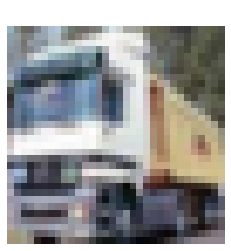

In [59]:
targets={0:'airplace',1:'automobile',2:'bird',3:'cat',4:'deer',
         5:'dog',6:'fog',7:'horse',8:'ship',9:'truck'}
#mamy 10 klas zmapowanych w slowniku
plt.imshow(X_train[1])
plt.title(targets[y_train[1][0]], color='white', fontsize=17)
plt.axis('off')
plt.show()

#obraz 32x32 pixele 

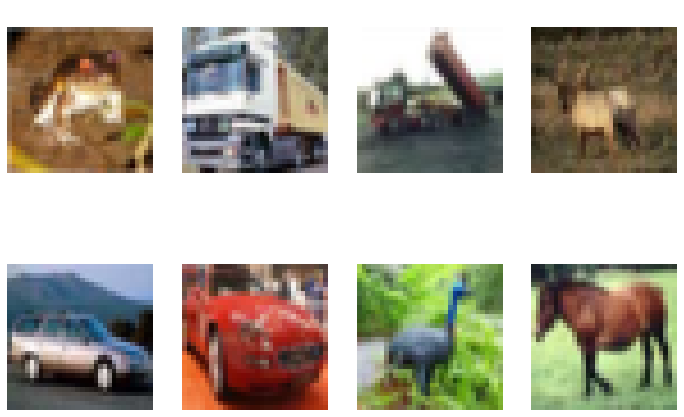

In [60]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i])
    plt.title(targets[y_train[i][0]], color='white', fontsize=17)
    plt.axis('off')
plt.show()

STANDARYZACJA

In [61]:
X_train=X_train/255.
X_test=X_test/255.
X_train.shape

(50000, 32, 32, 3)

Wypłaszczanie obrazow

In [64]:
X_train=X_train.reshape(-1,32*32*3)
X_train.shape
#mamy 3072 zmienne

(50000, 3072)

In [65]:
X_train[:5]


array([[0.2314, 0.2431, 0.2471, 0.1686, 0.1804, ..., 0.4627, 0.3294, 0.4824, 0.3608, 0.2824],
       [0.6039, 0.6941, 0.7333, 0.4941, 0.5373, ..., 0.5255, 0.5569, 0.5608, 0.5216, 0.5647],
       [1.    , 1.    , 1.    , 0.9922, 0.9922, ..., 0.3333, 0.3255, 0.3137, 0.3373, 0.3294],
       [0.1098, 0.098 , 0.0392, 0.1451, 0.1333, ..., 0.2196, 0.1451, 0.2824, 0.2549, 0.1804],
       [0.6667, 0.7059, 0.7765, 0.6588, 0.698 , ..., 0.2941, 0.3059, 0.2863, 0.302 , 0.3137]])

PCA- 3 komponenty

In [68]:
pca=PCA(n_components=3)
#3 kolumny

X_train_pca=pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.401 ,   2.729 ,   1.5017],
       [  0.8298,  -0.9499,   6.0038],
       [  7.7302, -11.5221,  -2.7536],
       [-10.3478,   0.0107,   1.101 ],
       [ -2.6257,  -4.9692,   1.0346]])

Wyjasniona wariancja 

In [67]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results


,explained_variance_ratio,cumulative,component
0,0.290766,0.290766,1
1,0.112531,0.403298,2
2,0.066944,0.470242,3


In [69]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [71]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['name'] = X_train_pca_df['class'].map(targets)
#dodajmy kolumne 'name' z nazwami klas
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class,name
0,-6.401018,2.729039,1.501710,6.0,fog
1,0.829783,-0.949943,6.003751,9.0,truck
2,7.730200,-11.522103,-2.753618,9.0,truck
3,-10.347817,0.010738,1.101019,4.0,deer
4,-2.625651,-4.969240,1.034586,1.0,automobile


Wizualizacja 3D głownych komponentow

In [72]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='name', 
              symbol='name', opacity=0.7, size_max=10, width=950, height=700,
              title='PCA - CIFAR dataset', template='plotly_dark')

Sprawdzmy ile nam wyjdzie komponentow, jesli ustawimy calkowita wariancje na 95%

In [73]:
pca=PCA(n_components=0.95)

X_train_pca=pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.401 ,   2.729 ,   1.5017,  -2.9533,  -4.4526, ...,   0.1003,  -0.297 ,  -0.0085,   0.1003,  -0.2656],
       [  0.8298,  -0.9499,   6.0038,   1.5049,  -1.3685, ...,   0.0951,   0.1599,  -0.3974,  -0.3527,  -0.3581],
       [  7.7302, -11.5221,  -2.7536,   2.3336,  -1.5844, ...,   0.126 ,  -0.0042,   0.1882,  -0.018 ,   0.3095],
       [-10.3478,   0.0107,   1.101 ,  -1.3045,  -1.5949, ...,   0.0183,   0.0791,   0.1171,   0.3127,   0.0369],
       [ -2.6257,  -4.9692,   1.0346,   3.3065,   1.2617, ...,   0.3336,  -0.0172,   0.1114,  -0.1674,  -0.2865]])

In [76]:
pca.n_components_
#z 3072 potrzebujmy 217

217

In [77]:
pca.explained_variance_ratio_

array([0.2908, 0.1125, 0.0669, 0.0368, 0.0361, 0.0281, 0.0271, 0.0217, 0.0206, 0.0144, 0.0131, 0.0107, 0.0105, 0.01  , 0.0092, 0.0082, 0.0074,
       0.0072, 0.0069, 0.0064, 0.0059, 0.0059, 0.005 , 0.0049, 0.0048, 0.0047, 0.0045, 0.0044, 0.004 , 0.0039, 0.0037, 0.0033, 0.0032, 0.0031,
       0.0031, 0.0029, 0.0026, 0.0026, 0.0025, 0.0025, 0.0024, 0.0023, 0.0023, 0.0022, 0.0021, 0.0021, 0.0019, 0.0019, 0.0018, 0.0018, 0.0018,
       0.0017, 0.0017, 0.0017, 0.0016, 0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0015, 0.0014, 0.0014, 0.0014, 0.0013, 0.0013, 0.0013, 0.0012,
       0.0012, 0.0012, 0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.0009,
       0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0007, 0.0007, 0.0007, 0.0007,
       0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006,

Wujasniona wariancja

In [78]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results.head()

,explained_variance_ratio,cumulative,component
0,0.290766,0.290766,1
1,0.112531,0.403298,2
2,0.066944,0.470242,3
3,0.036765,0.507006,4
4,0.036088,0.543095,5


In [79]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=950, template='plotly_dark'))
fig.show()

Widzimy, ze pierwsze komponenty dodaja dosc duzo do wariancji, im dalej tym mniej

PCA-WINE

In [80]:
import plotly.express as px 

np.set_printoptions(precision=4,suppress=True,edgeitems=5,linewidth=200)

Załadowanie danych

In [81]:
#dane dotycza gatunku wina z roznych regionow

df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df = df_raw.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [84]:
#wytnijmy dane z df
data=df.iloc[:,1:]
target=df.iloc[:,0]
data.head()
#chcemy zredukowac wymiar (13 kolumn) do wymiaru nizszego 
#mamy 3 klasy

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Podział na zbior treningowy i testowy

In [85]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(data,target)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (133, 13)
X_test shape: (45, 13)


Standaryzacja

In [86]:
from sklearn.preprocessing import StandardScaler 

scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)
X_train_std[:5]

array([[ 0.8615,  0.792 ,  0.6773,  0.0665,  0.515 , -0.6949, -1.4039,  1.1352, -1.3703,  0.37  ,  0.0729, -1.0661, -0.1768],
       [-0.8108, -1.2004, -0.9255, -0.3846, -0.8184,  1.9158,  1.6998, -0.981 ,  0.6533, -0.2186,  0.4431,  0.2459, -0.2427],
       [-0.9121, -0.7091, -0.5248,  0.1868,  0.2343, -1.8226, -0.9563,  0.0771, -0.2089, -0.8369, -0.1771, -1.0661,  0.4492],
       [ 0.19  ,  1.074 , -0.7434,  0.3672,  0.1641, -1.2047, -1.4136,  0.5655, -0.4904, -0.4318, -1.5933, -1.2594,  0.3174],
       [-0.2027, -0.7182,  0.6045, -0.5951, -0.3271,  0.3092,  0.3571, -0.8182, -0.2089, -0.4616,  0.6745,  1.4335,  0.927 ]])

PCA

In [89]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
#dane treningowe
X_train_pca=pca.fit_transform(X_train_std)
#na testowych
X_test_pca=pca.transform(X_test_std)
X_train_pca.shape

(133, 3)

Wyjasniona wariancja 

In [90]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.361233,0.361233,1
1,0.194018,0.555251,2
2,0.110974,0.666225,3


In [91]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained variance ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative explained variance')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=950, template='plotly_dark'))
fig.show()

1 głowny komponent daje ok 37% wariancji

In [92]:
#przejdzmy do utworzenia DF, aby narysowac wykres w 3D

In [93]:

X_train_pca_df = pd.DataFrame(data=np.c_[X_train_pca, y_train], columns=['pca1', 'pca2', 'pca3', 'target'])
X_train_pca_df.head()

,pca1,pca2,pca3,target
0,2.074950,1.263702,-0.265247,3.0
1,-2.274197,-1.535823,-0.114778,2.0
2,1.466580,-0.770090,-0.589607,2.0
3,2.537533,0.570387,-0.845177,3.0
4,-1.721604,-0.539477,0.098962,1.0


In [94]:

px.scatter_3d(X_train_pca_df, x='pca1', y='pca2', z='pca3', color='target', template='plotly_dark', width=950)

In [95]:
X_train_pca[:5]

array([[ 2.0749,  1.2637, -0.2652],
       [-2.2742, -1.5358, -0.1148],
       [ 1.4666, -0.7701, -0.5896],
       [ 2.5375,  0.5704, -0.8452],
       [-1.7216, -0.5395,  0.099 ]])

In [96]:
X_test_pca[:5]

array([[-2.2457,  0.5834, -1.0038],
       [ 1.4374, -1.2573, -1.036 ],
       [ 2.1276,  1.1304, -1.1931],
       [ 0.3908, -2.12  ,  1.147 ],
       [-2.2276, -0.5238, -2.1272]])

dopasowujemy dane na zbiorze treningowym, a na testowym dokonujemy transformacji danych

REKONSTRUKCJA OBRAZU - ostat przyklad z PCA


In [97]:
from keras.datasets import mnist

Wygenerowanie danych

In [98]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


Obcięcie obrazow do pierwszych 5000

In [99]:
X_train=X_train[:5000]
y_train=y_train[:5000]

Wizualizacja kilku obrazow

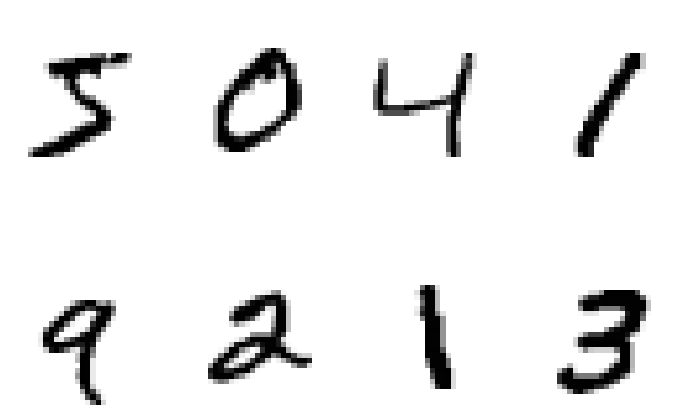

In [101]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='white', fontsize=17)
    plt.axis('off')
plt.show()

#wymairy 28x28 pikseli, recznie napisanych cyfr

Wyplaszczenie obrazow

In [102]:
X_train=X_train.reshape(-1,28*28)
X_train.shape

(5000, 784)

In [103]:
X_train=X_train/255.

PCA

In [107]:
#podamy od razu, ze chcemy otrzymac 95% wyjasnionej wariancji 

from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
X_train_pca=pca.fit_transform(X_train)
X_train_pca.shape

#WYCHODZI 148 KOMPONENTOW NA TEN WYNIK z kilku tys

(5000, 148)

Wyjasniona wariancja

In [105]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
...,...,...,...
143,0.000497,0.948219,144
144,0.000491,0.948711,145
145,0.000482,0.949193,146
146,0.000473,0.949665,147


In [106]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [108]:
X_train_pca[0].shape

(148,)

In [109]:
approx=pca.inverse_transform(X_train_pca)
approx[0].shape

(784,)

ODWRÓCENIE DZIAŁANIA METODY PCA

In [112]:
approx=pca.inverse_transform(X_train_pca)
approx[0].shape
#dochodzi do pewnej aproksymacji naszych danych wejsciowych (przed PCA)

(784,)

Wizualizacja roznicy pomiedzy zdj oryginalnym, a aproksymowanym

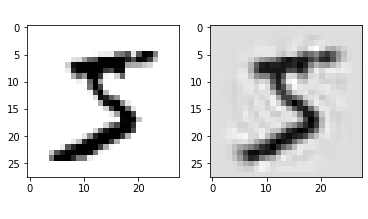

In [113]:
plt.subplot(121)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray_r', interpolation='nearest')
plt.xlabel('784 components', color='white', fontsize=14)
plt.title('Original image', color='white', fontsize=16)

plt.subplot(122)
plt.imshow(approx[0].reshape(28, 28), cmap='gray_r', interpolation='nearest')
plt.xlabel(f'{pca.n_components_} components', color='white', fontsize=14)
plt.title('95% variance', color='white', fontsize=16)
plt.show()

Porownanie procentu wyjasnionej wariancji

In [115]:
def make_pca(n_components, data, idx=0):

    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)

    approx = pca.inverse_transform(data_pca)

    plt.imshow(approx[idx].reshape(28, 28), cmap='gray_r', interpolation='nearest')
    plt.xlabel(f'{pca.n_components_} components', color='white', fontsize=12)
    plt.title(f'{str(n_components)}% var', color='white', fontsize=15)

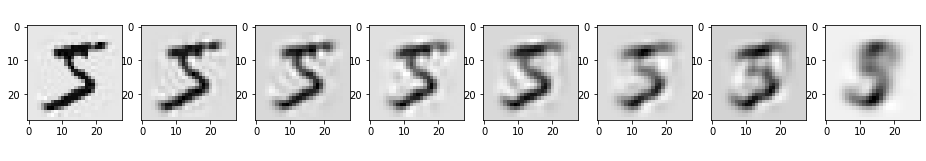

In [119]:
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train)
plt.show()
#ogolnie im mniej komponentow, tym trudniej odtworzyc obraz cyfry

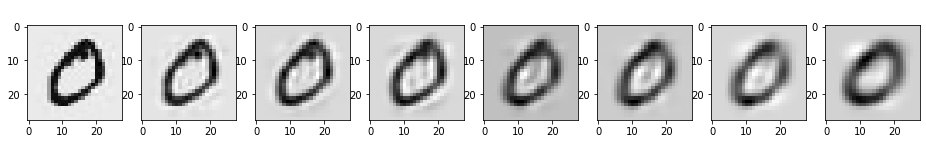

In [117]:
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train, idx=1)
plt.show()

Wizualizacja: 9

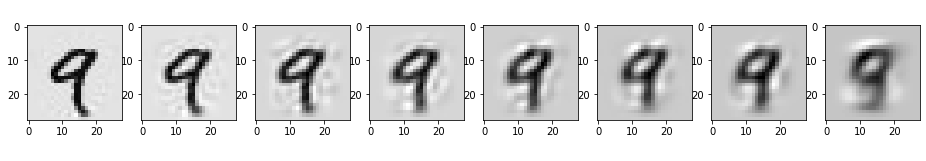

In [118]:
plt.figure(figsize=(16, 10))
for i, val in enumerate([0.99, 0.95, 0.90, 0.85, 0.8, 0.75, 0.7, 0.5]):
    plt.subplot(180 + i + 1)
    make_pca(val, X_train, idx=4)
plt.show()